# Capstone project 1: Housing prices advanced regression



In [1]:
#-----------------------------------------------------------------------------#
import pandas as pd
import numpy as np

#Load training data from csv files
df = pd.read_csv('train.csv', index_col=['Id']) 


## Data exploration and cleaning

In [2]:
#get overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

### Fill NA



In [3]:
#fill NA with 0

from pandas.api.types import is_string_dtype

for col in df.columns:
    if df[col].dtypes == 'object':
        df[col]=df[col].fillna('0') #fill na with 0
    else:
        df[col]=df[col].fillna(0)
        
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

In [4]:
#change the year to age
for col in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df[col] = df['YrSold'] - df[col]
#change SalePrice to fold of 1k
df['SalePrice'] = df.SalePrice / 1000

In [5]:
#create one more column to combine 1st floor square feet with 2nd floor, totalSF
df['totalSF'] = df['1stFlrSF'] + df['2ndFlrSF']

In [6]:
#ADD a column for price per square feet, PPSF
df['PPSF'] = df['SalePrice']/df['totalSF']

In [7]:
#Add Timeseries column using SoldYear and SoldMonth
df['SoldTime'] = df.YrSold.astype('str')+'-'+df.MoSold.astype('str')
df.SoldTime = pd.to_datetime(df.SoldTime)
df.SoldTime.head()

Id
1   2008-02-01
2   2007-05-01
3   2008-09-01
4   2006-02-01
5   2008-12-01
Name: SoldTime, dtype: datetime64[ns]

In [8]:
#Drop duplicates
df = df.drop_duplicates()
df.shape        

(1460, 83)

### Data visualization for data exploration

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

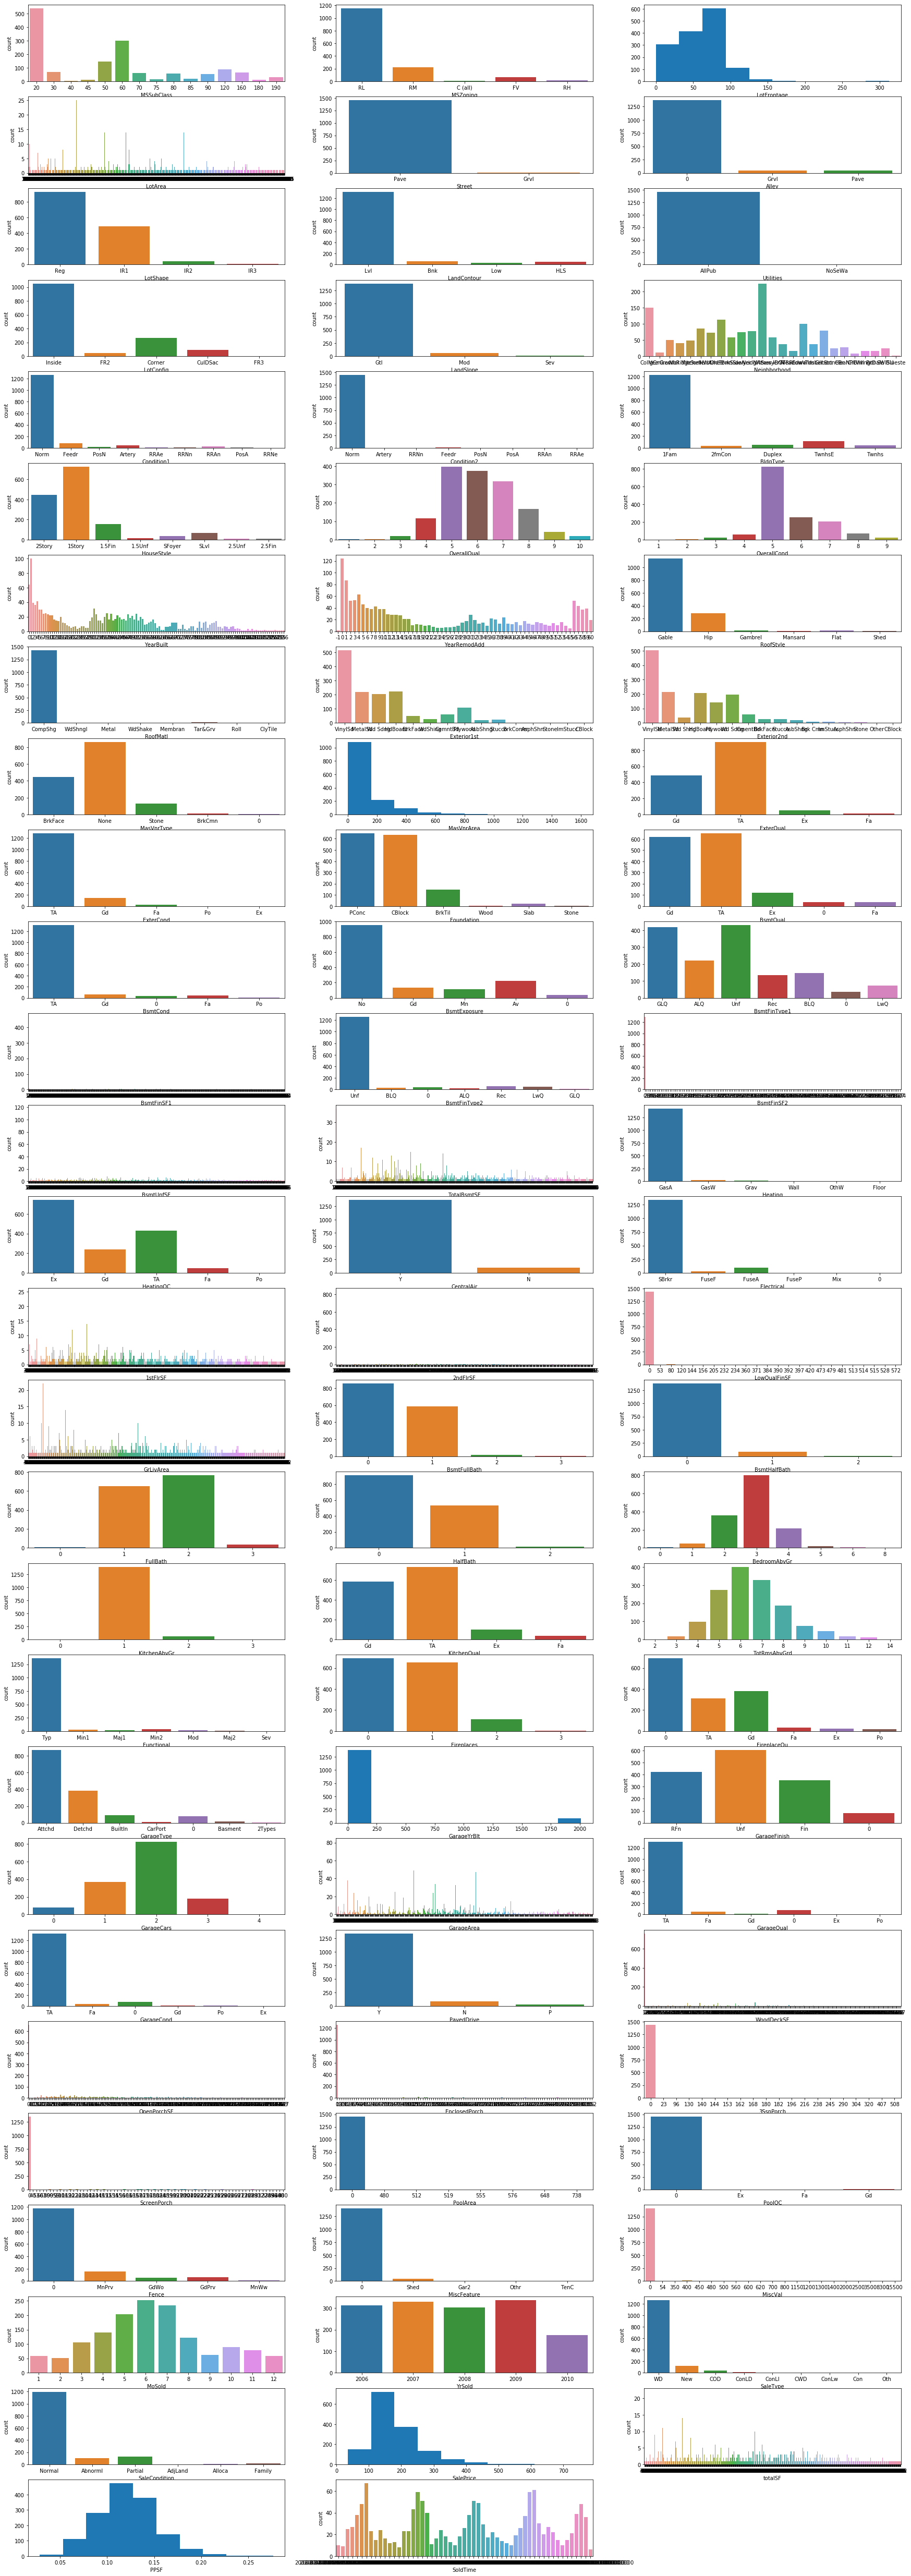

In [11]:
#Plot distribution of each column
fig1 = plt.figure(figsize=(30,90))

a = 0 #active plot number
for col in df.columns:
    a += 1
    ax = fig1.add_subplot(28,3,a)
    if df[col].dtype == 'float64':
        ax.hist(df[col], bins=10)
    else:
        sns.countplot(data=df, x=col,ax=ax)
    ax.set_xlabel(col)
       
fig1.savefig('distribution_plot.png')


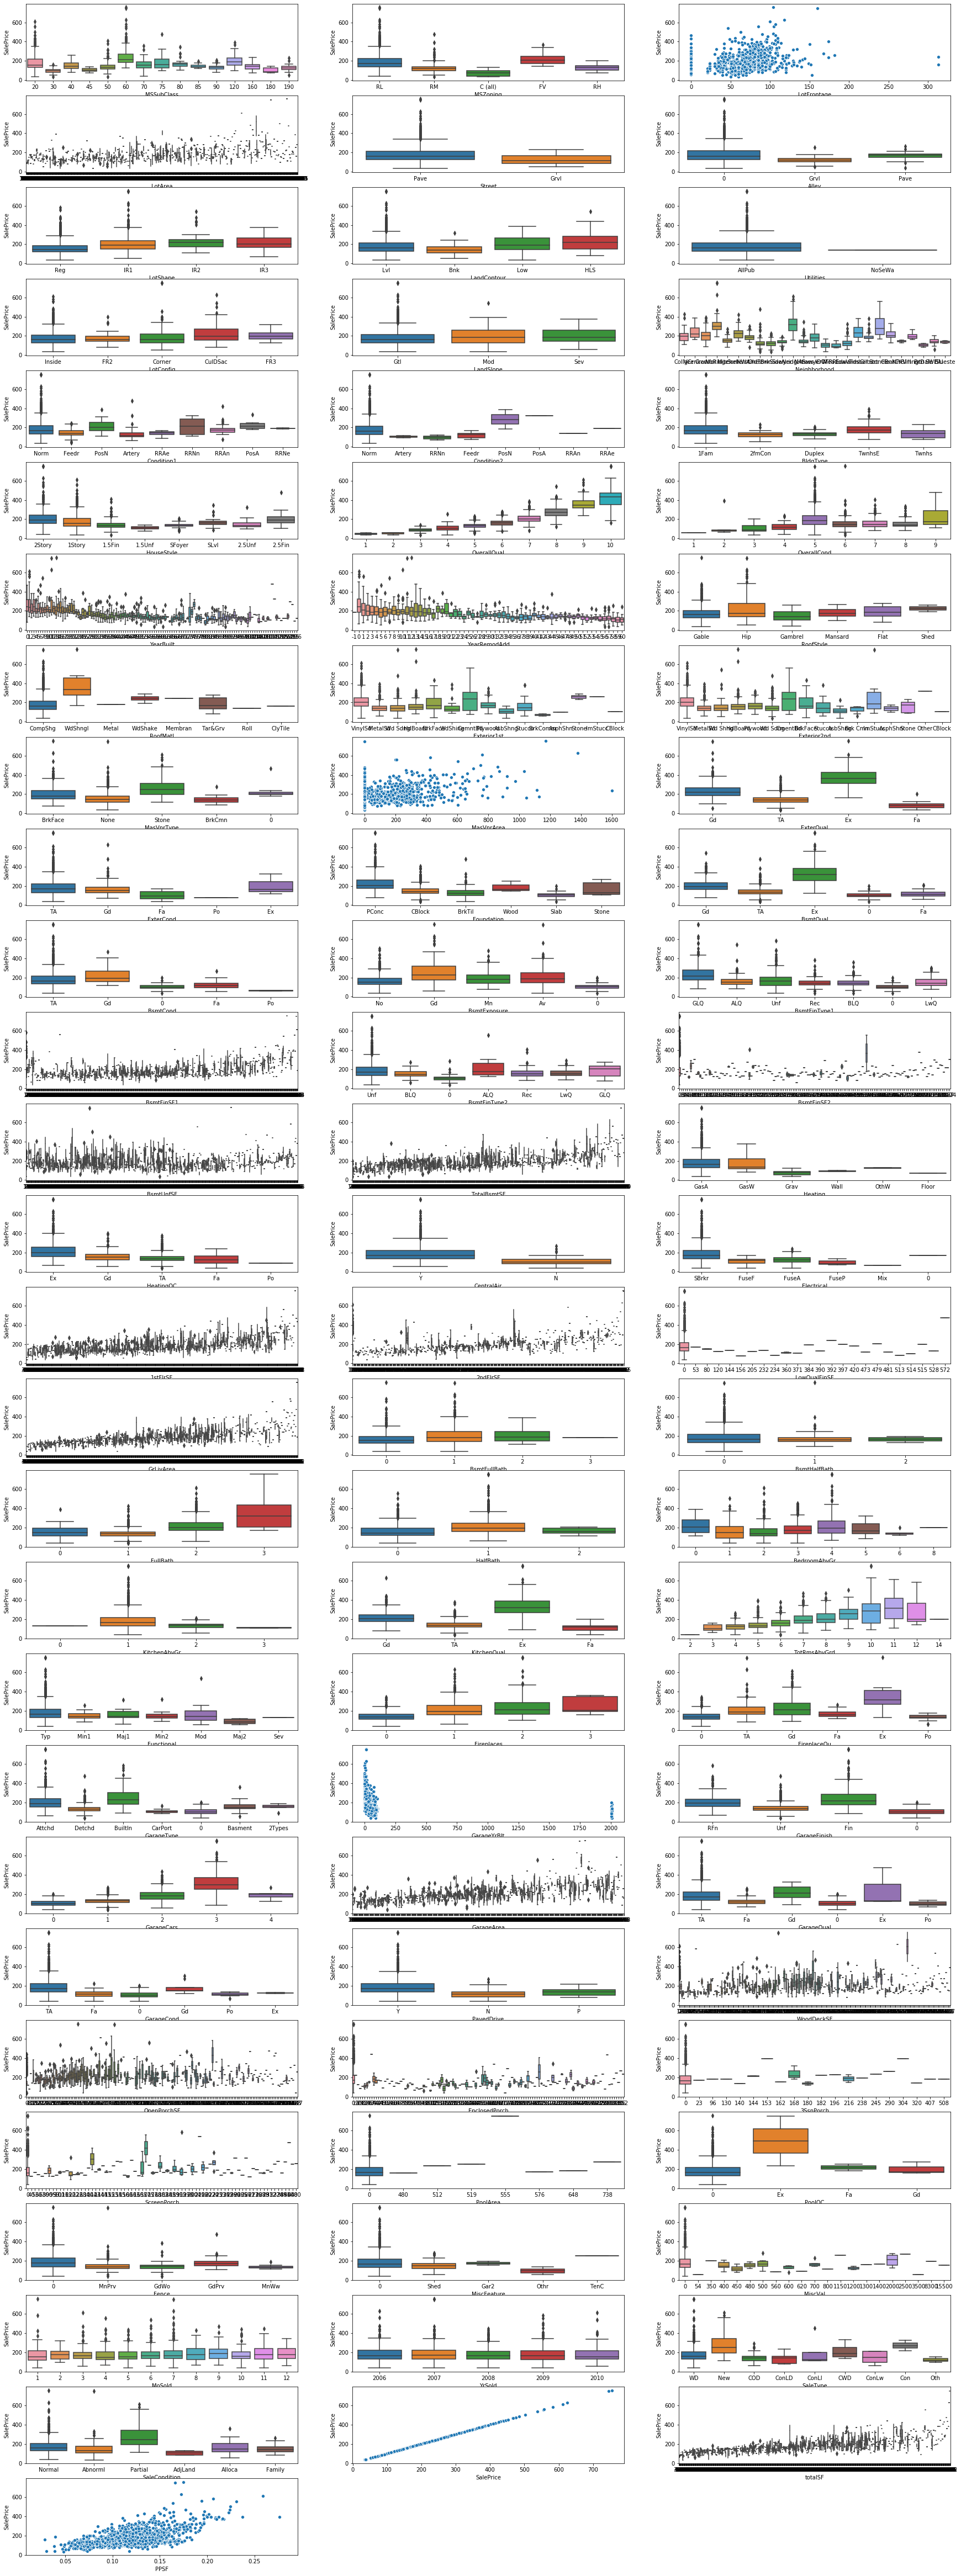

In [14]:
#plot coloumn and SalePrice relation
fig2 = plt.figure(figsize=(30,85))
y_col = 'SalePrice'
a = 0 #active plot number
for col in df.columns[:-1]:
    a += 1
    ax = fig2.add_subplot(28,3,a)
    if df[col].dtype == 'float64':
        sns.scatterplot(x=col, y=y_col, data=df,ax=ax)
    else:
        sns.catplot(x=col, y=y_col,kind='box',data=df,ax=ax)

    ax.set_xlabel(col)
    plt.close(2)
    
fig2.savefig('Correlation_plot.png')

### The Garage Year Built contain abnormal information, this should be due to NA value. >2000 means there is no Garage, it make sense to make the value very large instead of 0 because the value represent age of the Garage, and 0 presented as very new instead of no garage. but 2000 might be too extreme, therefore, I would choose to replace 2000 with a little bit more than maximum year built data.



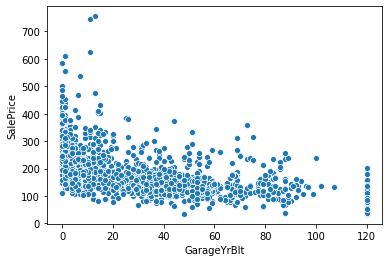

In [30]:
df.GarageYrBlt = np.where(df.GarageYrBlt > 120, 120, df.GarageYrBlt)
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=df)

## Modeling
### First Regression

### Predict Testing data